## Individual Project Tristan Helle

# Load libraries

In [229]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(pROC)        # AUC, ROC
library(e1071)       # Evaluation
library(tree)          # CART model
library(randomForest)  # Bagging and RF
library(gbm)           # Boosting tree
library(MASS)          # LDA


library(kknn)        # kNN model
library(nnet)        # One-vs-All Logistic Regression
library(dummies)     # Data processing
library(ROCR)        # ROC

# Resize plot
library(repr)

In [275]:
# Install missing packages
install.packages(c("data.table", "mlr3", "caret", "ggplot2","rattle", "plotrix", "rgl", "ISLR", "MASS", "datasets","mlr", "pROC", "e1071", "gridExtra", "kknn", "nnet", "dummies","ROCR"))

Warning message:
"packages 'data.table', 'caret', 'ggplot2', 'MASS', 'datasets', 'mlr', 'pROC', 'e1071', 'kknn', 'nnet', 'dummies', 'ROCR' are in use and will not be installed"
also installing the dependency 'rpart.plot'




package 'rpart.plot' successfully unpacked and MD5 sums checked
package 'mlr3' successfully unpacked and MD5 sums checked
package 'rattle' successfully unpacked and MD5 sums checked
package 'plotrix' successfully unpacked and MD5 sums checked
package 'rgl' successfully unpacked and MD5 sums checked
package 'ISLR' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\thelle\AppData\Local\Temp\Rtmpo3K9Qq\downloaded_packages


# Data exploring & pre-processing

In [231]:
wd <- "C:/Users/thelle/Desktop/Statistical learning and ML/Individual P/"

In [232]:
credit = read.csv(paste0(wd,'credit_default_train.csv'))

In [233]:
names(credit)[names(credit) == 'default.payment.next.month'] <- "default"

In [234]:
credit[!complete.cases(credit),]

cust_id LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4
7     29940    50000     1   3         2       44   0     0     0     2   
33    15273   160000     2  NA         2       54   1    -2    -2    -1   
36     3004    50000     2   3         1       35   0     0     0     0   
38     7989   150000     2   5         1       28  NA     0     0     0   
40    13536    40000     1   2         3       NA   0     0     0     0   
41    16601   420000     2   2         1       35   0     0     0     0   
44    10821   200000     1   2         2       30   0     0     0     0   
46    17983   360000     1   3         1       58  -1    -1    -1    -1   
58    11014   140000     1   2         2       24   0     0     0     0   
59    18888    30000     2   3         2       24   0     0     0     0   
69     7127    30000     1   2         1       33   2     2     0     0   
71     9640   450000     1   2         2       29   0     0     0     0   
74     3980   150000     1   1         1       50   0     0     0     0   
77     9326    20000     1  NA         2       40   1     2     2     2   
84    14403   160000     1   1         1       30  -1     0     0     0   
88    25651   200000     2  NA         1       45  -1    -1    -1    -1   
98    22462   180000     1   2         1       40  -1    -1    -1    -1   
101    5027    80000     2   2         2       27   1     2     2     2   
106     151   250000    NA   1         2       56  -2    -2    -2    -2   
118   13651   180000     2   2         2       29  -2    NA    -2    -2   
119   17369    60000     2   2         1       37   0    NA     0     0   
127    4776   230000     1   1         1       34   0     0     0     0   
128     985   310000    NA   1         2       27  -1    -1    -1    -1   
129   24920    70000     1   1         2       31   0    NA     0     0   
134   11428    10000     2   3        NA       53   0    -1     2    -1   
135    3124    60000     2   2         2       23   0     0     0     0   
140   18516   170000     2   2         1       52   0     0     0     0   
145   17096    80000     2   3         2       25   0     0     0    NA   
149    3069    10000     2   2         2       37  -1     0     0     0   
150    8720   600000     1   1         2       36  -2    -2    -2    -2   
<U+22EE>     <U+22EE> <U+22EE>  <U+22EE> <U+22EE>  <U+22EE> <U+22EE> <U+22EE> <U+22EE> <U+22EE> <U+22EE>
19849  9549    50000    2    2         2       23   0     0     0     2   
19851 29195   360000    2    1         2       39  -1    NA    -2    -2   
19852  5896    80000    2    2         2       27   0     0     0    NA   
19857 17259   500000    1    1         2       35  NA    -1     0     0   
19859 14191    20000    1    2         1       36   2     2     2     2   
19863  5449   250000    2    3         2       30  -1    -1    -1    -1   
19866  3204   110000    2    2         2       29   3     2     2     4   
19885 25770    20000    1    2         1       51   0     0     0     0   
19886  2190   300000    1    2         2       33   0     0     0    NA   
19889 14942    30000    2    3         1       54   0     0     0     0   
19892  6538    80000    2    1         2       24   0     0     0     0   
19912 13280   140000    2    2         1       35   0     0     0     0   
19914 11265   110000    1    5         1       36   0     0     0     0   
19915 14868    50000    2    2         1       39   1     2     2     2   
19916 29998    80000    2   NA         1       26   0     0     0     0   
19917 17142    80000    1    3         2       29   0     0     0     0   
19919 22474   320000    2    1         2       32  -1    -1    -1     0   
19926 25459   360000    1    1         2       37   1    NA    -1    -1   
19928  5559   500000    1    1         2       NA   0     0     0     0   
19934  2744   130000    2    1         2       29  -1    -1    -1    -1   
19943 29853   400000    1    1         2       39   2     2     2     2   
1

In [235]:
sum(is.na(credit))

[1] 4448

In [236]:
mean(is.na(credit))

[1] 0.008896

In [237]:
#as NAs are a small percentage of the dataset we remove them
credit = na.omit(credit) 

In [238]:
head(credit)

cust_id LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 <U+22EF>       
1 18895    70000    1   3         2        34  0     0     0     0     <U+22EF>
2 25102   390000    2   2         2        26  2     2     2     0     <U+22EF>
3 28867    60000    1   1         2        27  0     0     0     0     <U+22EF>
4  1842   140000    2   2         1        55  0     0     0     0     <U+22EF>
5  3371    50000    1   1         2        29  2     2     2     0     <U+22EF>
6 29925    20000    1   2         2        37  0     0     0     0     <U+22EF>
  BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5
1  25559     26134     26715    1700     1500     2000     1000     1000    
2 140387    128112    115514    5000     3000     5000     4548     4100    
3  26038     28607     27997    1378     1406     3000     3000        0    
4  72391     61298     62193    4200     2822     2336     2588     2250    
5   1047         0         0    3000        0     1000        0        0    
6  19105     19609     19283    1700     1600     1200     1000      900    
  PAY_AMT6 default
1 2000     0      
2 3300     0      
3  923     1      
4 2491     0      
5    0     1      
6 1000     0

### Pay_0 - 6:
-1 = pay duly
1 = payment delay for one month 
2 = payment delay for two month ...
9 = payment delay for nine and above months 

In [239]:
head(credit[7:12])

PAY_0 PAY_2 PAY_3 PAY_4 PAY_5 PAY_6
1 0     0     0     0     0      0   
2 2     2     2     0     0      0   
3 0     0     0     0     0      2   
4 0     0     0     0     0      0   
5 2     2     2     0     0     -2   
6 0     0     0     0     0      0

### BILL_ATM1 - 6
Amount of bill statement for each month

In [240]:
head(credit[13:18])

BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6
1  53972     23149     23968     25559     26134     26715   
2 185111    172865    153795    140387    128112    115514   
3  21387     22416     23444     26038     28607     27997   
4 108038    110216     84516     72391     61298     62193   
5   7881     10415      3997      1047         0         0   
6  20009     20602     21255     19105     19609     19283

### PAY_ATM1 - 6
Amount of previous payments for each month

In [241]:
head(credit[19:24])

PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5 PAY_AMT6
1 1700     1500     2000     1000     1000     2000    
2 5000     3000     5000     4548     4100     3300    
3 1378     1406     3000     3000        0      923    
4 4200     2822     2336     2588     2250     2491    
5 3000        0     1000        0        0        0    
6 1700     1600     1200     1000      900     1000

In [242]:
var_list <- names(credit[, 1:(ncol(credit)-1)])
var_list

[1] "cust_id"   "LIMIT_BAL" "SEX"       "EDUCATION" "MARRIAGE"  "AGE"      
 [7] "PAY_0"     "PAY_2"     "PAY_3"     "PAY_4"     "PAY_5"     "PAY_6"    
[13] "BILL_AMT1" "BILL_AMT2" "BILL_AMT3" "BILL_AMT4" "BILL_AMT5" "BILL_AMT6"
[19] "PAY_AMT1"  "PAY_AMT2"  "PAY_AMT3"  "PAY_AMT4"  "PAY_AMT5"  "PAY_AMT6"

In [243]:
cat_list <- c("SEX","EDUCATION","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","MARRIAGE")
cat_list

[1] "SEX"       "EDUCATION" "PAY_0"     "PAY_2"     "PAY_3"     "PAY_4"    
[7] "PAY_5"     "PAY_6"     "MARRIAGE"

In [244]:
# Convert categorical variables to dummy variables
dummy_list <- list()
for (v in cat_list) {
    # Create dummy variables
    tmp <- dummy(v, data=credit, sep="_", drop=TRUE)
    # Drop the 1st column
    tmp <- tmp[, 2:ncol(tmp), drop=FALSE]
    # Store the results
    dummy_list[[length(dummy_list)+1]] <- tmp
}

# Combine the dummy variables
dummy_df <- do.call(cbind, dummy_list)

# Add the dummy variables to the data frame
credit <- cbind(credit, dummy_df)

# Drop the original variable
credit <- credit[, !(names(credit) %in% cat_list)]

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts ar

In [245]:
credit

cust_id LIMIT_BAL AGE BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5
1     18895    70000    34   53972     23149     23968     25559     26134   
2     25102   390000    26  185111    172865    153795    140387    128112   
3     28867    60000    27   21387     22416     23444     26038     28607   
4      1842   140000    55  108038    110216     84516     72391     61298   
5      3371    50000    29    7881     10415      3997      1047         0   
6     29925    20000    37   20009     20602     21255     19105     19609   
8     11638   250000    30    5724      6729      4973      9693       799   
9      4761   320000    36   29862     33785      4900     15813         0   
10     6746   300000    35   91282     45885     35329     29368     18833   
11    26203   500000    41     719      1550       -50       -50     10037   
12    16128    90000    32     573         0         0         0         0   
13     2757    80000    29   59520     60492     62160     64714     62420   
14    21491    30000    24   28218     28704     30428     28914     29357   
15    29787   100000    41   77208     75377     77044     78333     78130   
16    25529   300000    42    6349       668      9737       367       -23   
17    12636   240000    27   81861     81446     82907     84832     87123   
18     9209   330000    47   19540     23240    166722    215506    138371   
19     2888    20000    38   16787     17912     18706     20086     19632   
20     6170    20000    52   20838     20212     20148     19845         0   
21    18951   220000    41  219198    114930    100749     74457     68604   
22    26366    30000    29   15361     18274     17697     18416     20099   
23    12499    30000    36   18811     18225     22630     21988     21057   
24    19364    80000    27   45198     45572     40910     40969     41275   
25     1614   200000    42       0         0         0         0         0   
26    20853   170000    26   63977     63630     51986     90196     50464   
27    15180    80000    48   44508     43709     52660     48532     44469   
28     9359   200000    29   21326     30928    124497    126854    139660   
29    27168    60000    27   43356     42381     46663     49877     50734   
30    24173   160000    42   35815     38023     40180     41318     42605   
31     9991    60000    51   56793     57455     59295     19212     19232   
<U+22EE>     <U+22EE> <U+22EE>  <U+22EE> <U+22EE>  <U+22EE>  <U+22EE>  <U+22EE>  <U+22EE> 
19964  1080   180000    44    1110      1110      1110      1110      1110   
19965 27324   350000    33    2394      1685       563      7535         0   
19966  6198   120000    39     326       326       326       326       326   
19967 23069    50000    25    9162      9818      7161      8377      8789   
19969  6335   130000    36    1738      1738      1738      1738      1738   
19970 13128    50000    23   48473     49454     47893     30707     50741   
19971  1340   180000    26   14565      9500     10122       770      4159   
19972  5551   180000    37   11368      3595      3837      5760         0   
19973 29835   120000    28    8922     43070     47023     53576     57529   
19974 25741   270000    45       0         0         0         0         0   
19975 17884    60000    27   27921     29954     33166     33528     32690   
19976 13675    50000    40   55397     55877     57335     59595     55949   
19977 12348   350000    33    6016      4322      5568      9571      6370   
19979 16286   230000    29    3764     10943      6588      4571      2526   
19980  8311   200000    37    4942      3554      3152      2732      1380   
19981 29255    20000    22   18021     17439     17466     17846     18310   
19982 10951    60000    32   59166     39328     38313     28660     31398   
19983  5762   200000    29    -792      -792      -792      -792      -792   
19984 18182   180000    33     996      1999      2216      2301      2364   
19985  5605    

In [246]:
var_list <- names(credit[, 1:(ncol(credit)-1)])
var_list

[1] "cust_id"     "LIMIT_BAL"   "AGE"         "BILL_AMT1"   "BILL_AMT2"  
 [6] "BILL_AMT3"   "BILL_AMT4"   "BILL_AMT5"   "BILL_AMT6"   "PAY_AMT1"   
[11] "PAY_AMT2"    "PAY_AMT3"    "PAY_AMT4"    "PAY_AMT5"    "PAY_AMT6"   
[16] "default"     "SEX_2"       "EDUCATION_1" "EDUCATION_2" "EDUCATION_3"
[21] "EDUCATION_4" "EDUCATION_5" "EDUCATION_6" "PAY_0_-1"    "PAY_0_0"    
[26] "PAY_0_1"     "PAY_0_2"     "PAY_0_3"     "PAY_0_4"     "PAY_0_5"    
[31] "PAY_0_6"     "PAY_0_7"     "PAY_0_8"     "PAY_2_-1"    "PAY_2_0"    
[36] "PAY_2_1"     "PAY_2_2"     "PAY_2_3"     "PAY_2_4"     "PAY_2_5"    
[41] "PAY_2_6"     "PAY_2_7"     "PAY_2_8"     "PAY_3_-1"    "PAY_3_0"    
[46] "PAY_3_1"     "PAY_3_2"     "PAY_3_3"     "PAY_3_4"     "PAY_3_5"    
[51] "PAY_3_6"     "PAY_3_7"     "PAY_3_8"     "PAY_4_-1"    "PAY_4_0"    
[56] "PAY_4_1"     "PAY_4_2"     "PAY_4_3"     "PAY_4_4"     "PAY_4_5"    
[61] "PAY_4_6"     "PAY_4_7"     "PAY_5_-1"    "PAY_5_0"     "PAY_5_2"    
[66] "PAY_5_3"     "PAY_5_4"     "PAY_5_5"     "PAY_5_6"     "PAY_5_7"    
[71] "PAY_6_-1"    "PAY_6_0"     "PAY_6_2"     "PAY_6_3"     "PAY_6_4"    
[76] "PAY_6_5"     "PAY_6_6"     "PAY_6_7"     "PAY_6_8"     "MARRIAGE_1" 
[81] "MARRIAGE_2"

In [247]:
names(credit)[names(credit) == "PAY_0_-1"] <- "PAY_0_1_2"
names(credit)[names(credit) == "PAY_2_-1"] <- "PAY_2_1_2"
names(credit)[names(credit) == "PAY_3_-1"] <- "PAY_3_1_2"
names(credit)[names(credit) == "PAY_4_-1"] <- "PAY_4_1_2"
names(credit)[names(credit) == "PAY_5_-1"] <- "PAY_5_1_2"
names(credit)[names(credit) == "PAY_6_-1"] <- "PAY_6_1_2"


In [248]:
var_list <- names(credit[, 1:(ncol(credit)-1)])
var_list

[1] "cust_id"     "LIMIT_BAL"   "AGE"         "BILL_AMT1"   "BILL_AMT2"  
 [6] "BILL_AMT3"   "BILL_AMT4"   "BILL_AMT5"   "BILL_AMT6"   "PAY_AMT1"   
[11] "PAY_AMT2"    "PAY_AMT3"    "PAY_AMT4"    "PAY_AMT5"    "PAY_AMT6"   
[16] "default"     "SEX_2"       "EDUCATION_1" "EDUCATION_2" "EDUCATION_3"
[21] "EDUCATION_4" "EDUCATION_5" "EDUCATION_6" "PAY_0_1_2"   "PAY_0_0"    
[26] "PAY_0_1"     "PAY_0_2"     "PAY_0_3"     "PAY_0_4"     "PAY_0_5"    
[31] "PAY_0_6"     "PAY_0_7"     "PAY_0_8"     "PAY_2_1_2"   "PAY_2_0"    
[36] "PAY_2_1"     "PAY_2_2"     "PAY_2_3"     "PAY_2_4"     "PAY_2_5"    
[41] "PAY_2_6"     "PAY_2_7"     "PAY_2_8"     "PAY_3_1_2"   "PAY_3_0"    
[46] "PAY_3_1"     "PAY_3_2"     "PAY_3_3"     "PAY_3_4"     "PAY_3_5"    
[51] "PAY_3_6"     "PAY_3_7"     "PAY_3_8"     "PAY_4_1_2"   "PAY_4_0"    
[56] "PAY_4_1"     "PAY_4_2"     "PAY_4_3"     "PAY_4_4"     "PAY_4_5"    
[61] "PAY_4_6"     "PAY_4_7"     "PAY_5_1_2"   "PAY_5_0"     "PAY_5_2"    
[66] "PAY_5_3"     "PAY_5_4"     "PAY_5_5"     "PAY_5_6"     "PAY_5_7"    
[71] "PAY_6_1_2"   "PAY_6_0"     "PAY_6_2"     "PAY_6_3"     "PAY_6_4"    
[76] "PAY_6_5"     "PAY_6_6"     "PAY_6_7"     "PAY_6_8"     "MARRIAGE_1" 
[81] "MARRIAGE_2"

In [259]:
creditcat = credit

In [296]:
#export the data to a csv file for submission:

write.csv(creditcat,paste0(wd,"/basetable.csv"), row.names = FALSE)

# Applying models onto the credit dataset

The models that were chosen are the following:
- Logistic Regression
- LDA
- QDA
- KNN
- Classification Tree

We split the data in order to be able to have a test and train for the future models

In [249]:
## 75% of the sample size
smp_size <- floor(0.75 * nrow(credit))

## set the seed to make your partition reproducible
set.seed(123)
train_cred <- sample(seq_len(nrow(credit)), size = smp_size)

credit_train <- credit[train_cred, ]
credit_test <- credit[-train_cred, ]

# Logistic Regression - OKK

In [147]:
md_logreg <- glm(default ~ ., data=credit, family='binomial')
summary(md_logreg)


Call:
glm(formula = default ~ ., family = "binomial", data = credit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6248  -0.6082  -0.5062  -0.2904   3.2508  

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.639e+01  3.925e+02  -0.042 0.966680    
cust_id     -3.755e-06  2.474e-06  -1.518 0.129134    
LIMIT_BAL   -1.539e-06  2.392e-07  -6.433 1.25e-10 ***
AGE          2.835e-03  2.706e-03   1.048 0.294728    
BILL_AMT1   -1.300e-06  1.569e-06  -0.828 0.407451    
BILL_AMT2    3.158e-06  2.072e-06   1.524 0.127476    
BILL_AMT3    1.458e-06  1.754e-06   0.831 0.405901    
BILL_AMT4   -1.569e-06  1.829e-06  -0.858 0.390929    
BILL_AMT5   -1.092e-06  2.148e-06  -0.508 0.611153    
BILL_AMT6    1.542e-06  1.792e-06   0.860 0.389627    
PAY_AMT1    -1.290e-05  3.359e-06  -3.842 0.000122 ***
PAY_AMT2    -1.030e-05  3.244e-06  -3.176 0.001495 ** 
PAY_AMT3     1.325e-06  1.979e-06   0.669 0.5

The variables that are statistically significant are the following:

LIMIT_BAL + PAY_0  + PAY_AMT1 + PAY_2_0  + PAY_2_4 + PAY_6_0

In [148]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_logreg <- makeLearner("classif.logreg", predict.type="prob", fix.factors.prediction=T)

# Define the task
task_logreg <- makeClassifTask(id="cust_id", data=credit, target="default")

# Run the k-fold CV
res_logreg=resample(lnr_logreg, task_logreg, rdesc, measures=list(mlr::auc))

Resampling: cross-validation

Measures:             auc       

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
[Resample] iter 1:    0.7576651 

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
[Resample] iter 2:    0.7349182 

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
[Resample] iter 3:    0.7755039 

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
[Resample] iter 4:    0.7645679 

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
[Resample] iter 5:    0.7455138 

Warning message in predict.lm(object, newdata,

In [149]:
# Make prediction on both train and test data
pred_train_prob <- predict(md_logreg, newdata=credit_train, type='response')

pred_test_prob <- predict(md_logreg, newdata=credit_test, type='response')

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


In [150]:
# Evaluation model on train
threshold <- 0.5  # Decision threshold
pred_train <- rep('0', length(pred_train_prob))
pred_train[pred_train_prob > threshold] <- '1'

# Confusion matrix
print('Confusion matrix:')
table(pred_train, credit_train$default)

# Accuracy and error rate
acc_logreg <- mean(pred_train == credit_train$default)
err_rate <- 1 - acc_logreg

print(paste('Accuracy =', round(acc_logreg, 2), '%'))
print(paste('Error =', round(err_rate, 2), '%'))


[1] "Confusion matrix:"


          
pred_train    0    1
         0 8931 1708
         1  423  930

[1] "Accuracy = 0.82 %"
[1] "Error = 0.18 %"


Results for Logistic Regression

In [151]:
#Accuracy
print(paste0("Accuracy: ", round(acc_logreg,2)))
#Aggregated AUC after CV = 10
print(paste0("Aggregated AUC: ", round(res_logreg$aggr,2)))

[1] "Accuracy: 0.82"
[1] "Aggregated AUC: 0.76"


# LDA

In [152]:
#does not work with categoricals as there is collinearity

credit = read.csv(paste0(wd,'credit_default_train.csv'))

names(credit)[names(credit) == 'default.payment.next.month'] <- "default"

credit = na.omit(credit) 

## 75% of the sample size
smp_size <- floor(0.75 * nrow(credit))

## set the seed to make your partition reproducible
set.seed(123)
train_cred <- sample(seq_len(nrow(credit)), size = smp_size)

credit_train <- credit[train_cred, ]
credit_test <- credit[-train_cred, ]

In [153]:
md_lda <- lda(default ~. ,data=credit)
md_lda

Call:
lda(default ~ ., data = credit)

Prior probabilities of groups:
        0         1 
0.7786742 0.2213258 

Group means:
   cust_id LIMIT_BAL     SEX EDUCATION MARRIAGE      AGE      PAY_0      PAY_2
0 15088.72  176600.3 1.61489  1.838969 1.560116 35.44711 -0.2079351 -0.2927476
1 14810.81  131028.5 1.56824  1.888669 1.538005 35.60469  0.6287087  0.4297824
       PAY_3      PAY_4      PAY_5       PAY_6 BILL_AMT1 BILL_AMT2 BILL_AMT3
0 -0.3135491 -0.3533853 -0.3866356 -0.40478676  52308.40  49858.97  47823.25
1  0.3489686  0.2314213  0.1531506  0.09183385  47058.04  45950.23  43821.02
  BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5
0  43665.48  40591.75  39095.85 6067.816 6540.196 5674.914 5389.861 5280.472
1  40940.06  38560.36  37305.85 3359.854 3286.275 3500.689 2869.854 2894.434
  PAY_AMT6
0 5704.579
1 3331.764

Coefficients of linear discriminants:
                    LD1
cust_id   -3.184118e-06
LIMIT_BAL -3.159008e-07
SEX       -9.755043e-02
EDUCATI

In [154]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_lda <- makeLearner("classif.lda", predict.type="prob", fix.factors.prediction=T)

# Define the task
task_logreg <- makeClassifTask(id="cust_id", data=credit, target="default")

# Run the k-fold CV
res_lda_all = resample(lnr_lda, task_logreg, rdesc, measures=list(mlr::auc))

Resampling: cross-validation

Measures:             auc       

[Resample] iter 1:    0.6959352 

[Resample] iter 2:    0.6735196 

[Resample] iter 3:    0.7499908 

[Resample] iter 4:    0.6888624 

[Resample] iter 5:    0.6896027 

[Resample] iter 6:    0.6775419 

[Resample] iter 7:    0.6909073 

[Resample] iter 8:    0.7352473 

[Resample] iter 9:    0.7382232 

[Resample] iter 10:   0.7418520 




Aggregated Result: auc.test.mean=0.7081682






In [155]:
# Predict and evaluate on test data
lda_pred <- predict(md_lda, newdata=credit_test)


# Confusion matrix
print('Confusion matrix:')
table(lda_pred$class, credit_test$default)

# Accuracy
acc_lda_all <- mean(lda_pred$class == credit_test$default)
print(paste('Accuracy =', round(acc_lda_all, 2), '%'))

[1] "Confusion matrix:"


   
       0    1
  0 3004  674
  1   93  227

[1] "Accuracy = 0.81 %"


In [156]:
#Accuracy
print(paste0("Accuracy: ", round(acc_lda_all,2)))
#Aggregated AUC after CV = 10
print(paste0("Aggregated AUC: ", round(res_lda_select$aggr,2)))

[1] "Accuracy: 0.81"
[1] "Aggregated AUC: 0.71"


# QDA

In [157]:
md_qda <- qda(default ~., data=credit_train)
md_qda

Call:
qda(default ~ ., data = credit_train)

Prior probabilities of groups:
      0       1 
0.78002 0.21998 

Group means:
   cust_id LIMIT_BAL      SEX EDUCATION MARRIAGE      AGE      PAY_0      PAY_2
0 15160.05  176974.6 1.614176  1.845628 1.560723 35.48001 -0.2069703 -0.2926021
1 14712.70  132088.7 1.569750  1.896133 1.536770 35.59136  0.6239575  0.4329037
      PAY_3      PAY_4      PAY_5       PAY_6 BILL_AMT1 BILL_AMT2 BILL_AMT3
0 -0.310883 -0.3522557 -0.3829378 -0.40132564  52553.77  49904.63  47990.00
1  0.363533  0.2479151  0.1595906  0.09249431  48126.90  46988.45  44563.12
  BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5
0  43889.16  40887.37  39390.61 5857.369 6470.346 5622.272 5427.892 5230.803
1  41853.02  39336.71  38361.23 3436.911 3194.100 3476.079 2842.249 2982.746
  PAY_AMT6
0 5711.310
1 3453.662

In [158]:
# Predict and evaluate on test data
qda_pred <- predict(md_qda, newdata=credit_test)


# Confusion matrix
print('Confusion matrix:')
table(qda_pred$class, credit_test$default)

# Accuracy
acc_qda <- mean(qda_pred$class == credit_test$default)
print(paste('Accuracy =', round(acc_qda, 2), '%'))

[1] "Confusion matrix:"


   
       0    1
  0  856  111
  1 2241  790

[1] "Accuracy = 0.41 %"


In [159]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_qda <- makeLearner("classif.qda", predict.type="prob", fix.factors.prediction=T)

# Define the task
task_logreg <- makeClassifTask(id="cust_id", data=credit, target="default")

# Run the k-fold CV
res_qda = resample(lnr_qda, task_logreg, rdesc, measures=list(mlr::auc))

Resampling: cross-validation

Measures:             auc       

[Resample] iter 1:    0.6974845 

[Resample] iter 2:    0.6889800 

[Resample] iter 3:    0.6905455 

[Resample] iter 4:    0.7249774 

[Resample] iter 5:    0.6960128 

[Resample] iter 6:    0.7305781 

[Resample] iter 7:    0.7323736 

[Resample] iter 8:    0.7184891 

[Resample] iter 9:    0.7431165 

[Resample] iter 10:   0.7003590 




Aggregated Result: auc.test.mean=0.7122916






In [160]:
#Accuracy
print(paste0("Accuracy: ", round(acc_qda,2)))
#Aggregated AUC after CV = 10
print(paste0("Aggregated AUC: ", round(res_qda$aggr,2)))

[1] "Accuracy: 0.41"
[1] "Aggregated AUC: 0.71"


# kNN

In [161]:
#works with categoricals

In [183]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_knn <- makeLearner("classif.kknn", predict.type="prob", fix.factors.prediction=T)

# Define the task
task_logreg <- makeClassifTask(id="cust_id", data=credit, target="default")

# Set hyper parameter tuning
discrete_ps = makeParamSet(
  makeDiscreteParam("k", values = c(1, 5, 10, 20, 50, 100, 200, 300, 500 , 700 , 1000 , 1500))
)
ctrl = makeTuneControlGrid()

# Run the hyper parameter tuning with k-fold CV
res_best_knn <- tuneParams(lnr_knn, task=task_logreg, resampling=rdesc,
  par.set=discrete_ps, control=ctrl, measures=list(mlr::auc))

[Tune] Started tuning learner classif.kknn for parameter set:

      Type len Def                                   Constr Req Tunable Trafo
k discrete   -   - 1,5,10,20,50,100,200,300,500,700,1000...   -    TRUE     -

With control class: TuneControlGrid

Imputation value: -0

[Tune-x] 1: k=1

[Tune-y] 1: auc.test.mean=0.6045794; time: 0.1 min

[Tune-x] 2: k=5

[Tune-y] 2: auc.test.mean=0.6745233; time: 0.1 min

[Tune-x] 3: k=10

[Tune-y] 3: auc.test.mean=0.7006403; time: 0.1 min

[Tune-x] 4: k=20

[Tune-y] 4: auc.test.mean=0.7217185; time: 0.1 min

[Tune-x] 5: k=50

[Tune-y] 5: auc.test.mean=0.7397365; time: 0.1 min

[Tune-x] 6: k=100

[Tune-y] 6: auc.test.mean=0.7476423; time: 0.1 min

[Tune-x] 7: k=200

[Tune-y] 7: auc.test.mean=0.7515397; time: 0.2 min

[Tune-x] 8: k=300

[Tune-y] 8: auc.test.mean=0.7528092; time: 0.2 min

[Tune-x] 9: k=500

[Tune-y] 9: auc.test.mean=0.7534882; time: 0.2 min

[Tune-x] 10: k=700

[Tune-y] 10: auc.test.mean=0.7537088; time: 0.3 min

[Tune-x] 11: k=1

In [163]:
str(res_best_knn)

List of 7
 $ learner   :List of 15
  ..$ id                    : chr "classif.kknn"
  ..$ type                  : chr "classif"
  ..$ package               : chr "!kknn"
  ..$ properties            : chr [1:5] "twoclass" "multiclass" "numerics" "factors" ...
  ..$ par.set               :List of 2
  .. ..$ pars     :List of 4
  .. .. ..$ k       :List of 15
  .. .. .. ..$ id          : chr "k"
  .. .. .. ..$ type        : chr "integer"
  .. .. .. ..$ len         : int 1
  .. .. .. ..$ lower       : int 1
  .. .. .. ..$ upper       : num Inf
  .. .. .. ..$ values      : NULL
  .. .. .. ..$ cnames      : NULL
  .. .. .. ..$ allow.inf   : logi FALSE
  .. .. .. ..$ has.default : logi TRUE
  .. .. .. ..$ default     : int 7
  .. .. .. ..$ trafo       : NULL
  .. .. .. ..$ requires    : NULL
  .. .. .. ..$ tunable     : logi TRUE
  .. .. .. ..$ special.vals: list()
  .. .. .. ..$ when        : chr "train"
  .. .. .. ..- attr(*, "class")= chr [1:2] "LearnerParam" "Param"
  .. .. ..$ distance:L

In [164]:
bestk = res_best_knn$x$k

In [165]:
bestk

[1] 1000

In [166]:
#As the kernel shuts down when we use 1000 K we will manually input K

In [167]:
newk = sqrt(NROW(credit_train))

In [168]:
#bestk2 = ifelse(bestk > 301 , newk , bestk)
#bestk2

[1] 109.508

In [225]:
# We take the highest possible value for the K as the algorithm does not support k = 1000

In [214]:
bestk2 = 400

Finding the accuracy for the knn

In [215]:
#From: https://www.edureka.co/blog/knn-algorithm-in-r/#Practical%20Implementation%20Of%20KNN%20Algorithm%20In%20R

#Install class package
install.packages('class')
# Load class package
library(class)

Warning message:
"package 'class' is in use and will not be installed"


In [216]:
knn1 <- knn(train=credit_train, test=credit_test, cl=credit_train$default, k= bestk2)

In [217]:
acc_knn <- 100 * sum(credit_test$default == knn1)/NROW(credit_test$default)

In [218]:
acc_knn

[1] 77.46373

In [219]:
round(bestk2,0)

[1] 400

In [220]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_knn <- makeLearner("classif.kknn", predict.type="prob", fix.factors.prediction=T, k=round(bestk2,0))

# Define the task
task_logreg <- makeClassifTask(id="cust_id", data=credit, target="default")

# Run the k-fold CV
res_best_knn = resample(lnr_knn, task_logreg, rdesc, measures=list(mlr::auc))

Resampling: cross-validation

Measures:             auc       

[Resample] iter 1:    0.7702803 

[Resample] iter 2:    0.7457242 

[Resample] iter 3:    0.7624326 

[Resample] iter 4:    0.7723858 

[Resample] iter 5:    0.7472688 

[Resample] iter 6:    0.7392011 

[Resample] iter 7:    0.7505126 

[Resample] iter 8:    0.7426397 

[Resample] iter 9:    0.7636393 

[Resample] iter 10:   0.7400151 




Aggregated Result: auc.test.mean=0.7534100






In [226]:
res_best_knn$aggr

auc.test.mean 
      0.75341

In [227]:
#Accuracy
print(paste0("Accuracy: ", round(acc_knn,2)))
#Aggregated AUC after CV = 10
print(paste0("Aggregated AUC: ", round(res_best_knn$aggr,2)))

[1] "Accuracy: 77.46"
[1] "Aggregated AUC: 0.75"


# Classification Tree

In [260]:
#works with categoricals

In [261]:
## 75% of the sample size
smp_size <- floor(0.75 * nrow(creditcat))

## set the seed to make your partition reproducible
set.seed(123)
train_cred <- sample(seq_len(nrow(credit)), size = smp_size)

credit_train <- creditcat[train_cred, ]
credit_test <- creditcat[-train_cred, ]


Regression tree:
tree(formula = default ~ ., data = credit_train)
Variables actually used in tree construction:
[1] "PAY_0_2"  "PAY_3_2"  "PAY_AMT1"
Number of terminal nodes:  4 
Residual mean deviance:  0.1428 = 1712 / 11990 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.6859 -0.2240 -0.1056  0.0000 -0.1056  0.8944 

node), split, n, deviance, yval
      * denotes terminal node

1) root 11992 2058.0 0.2200  
  2) PAY_0_2 < 0.5 10954 1587.0 0.1758  
    4) PAY_3_2 < 0.5 9916 1270.0 0.1508  
      8) PAY_AMT1 < 1606.5 3781  657.3 0.2240 *
      9) PAY_AMT1 > 1606.5 6135  579.6 0.1056 *
    5) PAY_3_2 > 0.5 1038  252.0 0.4152 *
  3) PAY_0_2 > 0.5 1038  223.6 0.6859 *

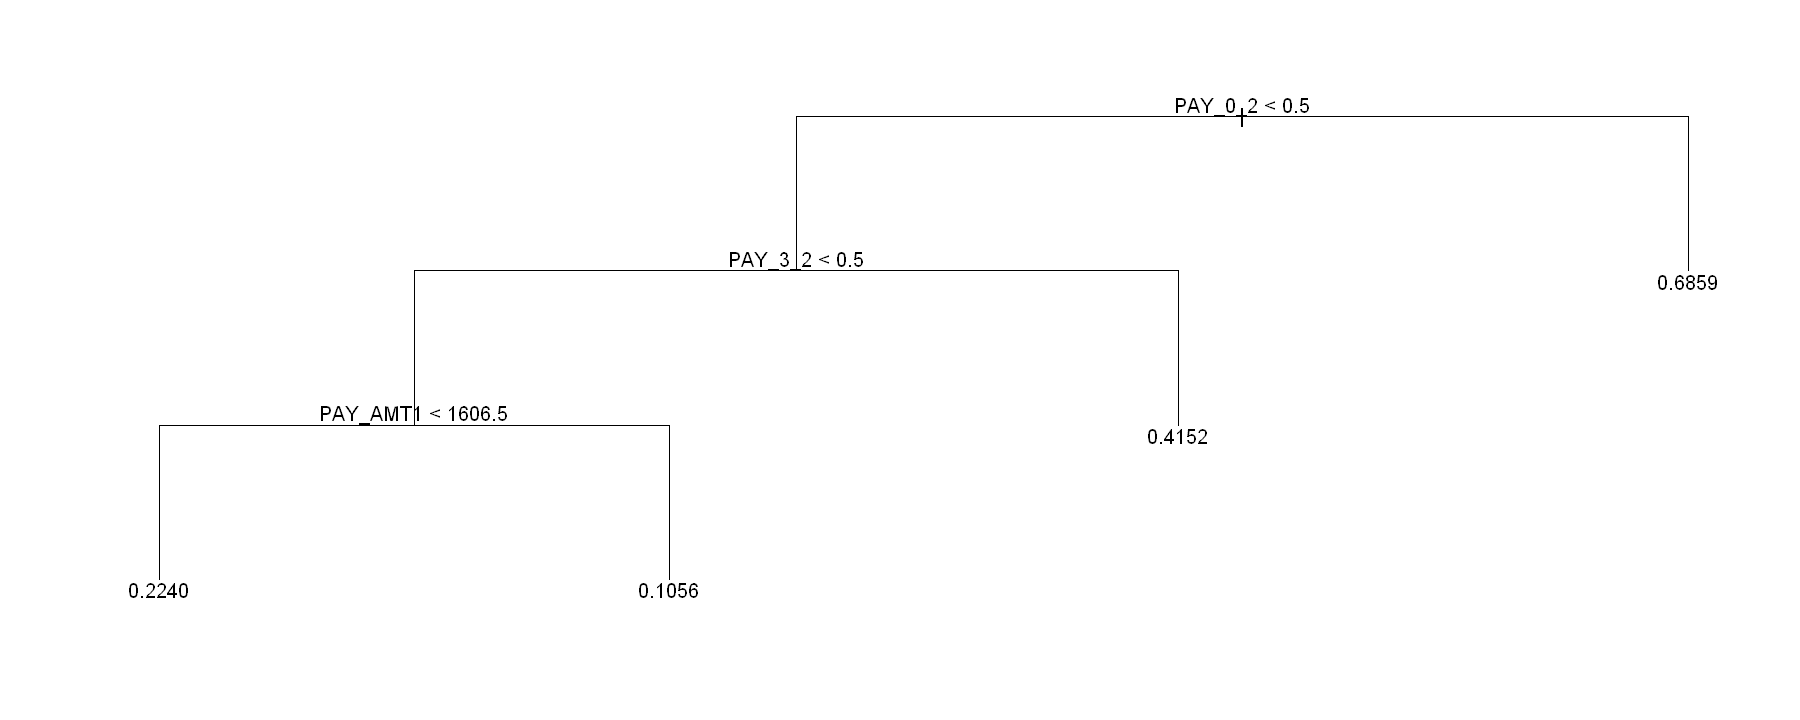

In [262]:
# Fit the Decision Tree model

md_classtree <- tree(default ~ ., data=credit_train)
summary(md_classtree)

options(repr.plot.width=15, repr.plot.height=6)
plot(md_classtree, type='uniform')
text(md_classtree, pretty=0)

md_classtree

In [263]:
md_rtree <- tree(default ~ ., data=credit_train)
summary(md_rtree)


Regression tree:
tree(formula = default ~ ., data = credit_train)
Variables actually used in tree construction:
[1] "PAY_0_2"  "PAY_3_2"  "PAY_AMT1"
Number of terminal nodes:  4 
Residual mean deviance:  0.1428 = 1712 / 11990 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.6859 -0.2240 -0.1056  0.0000 -0.1056  0.8944 

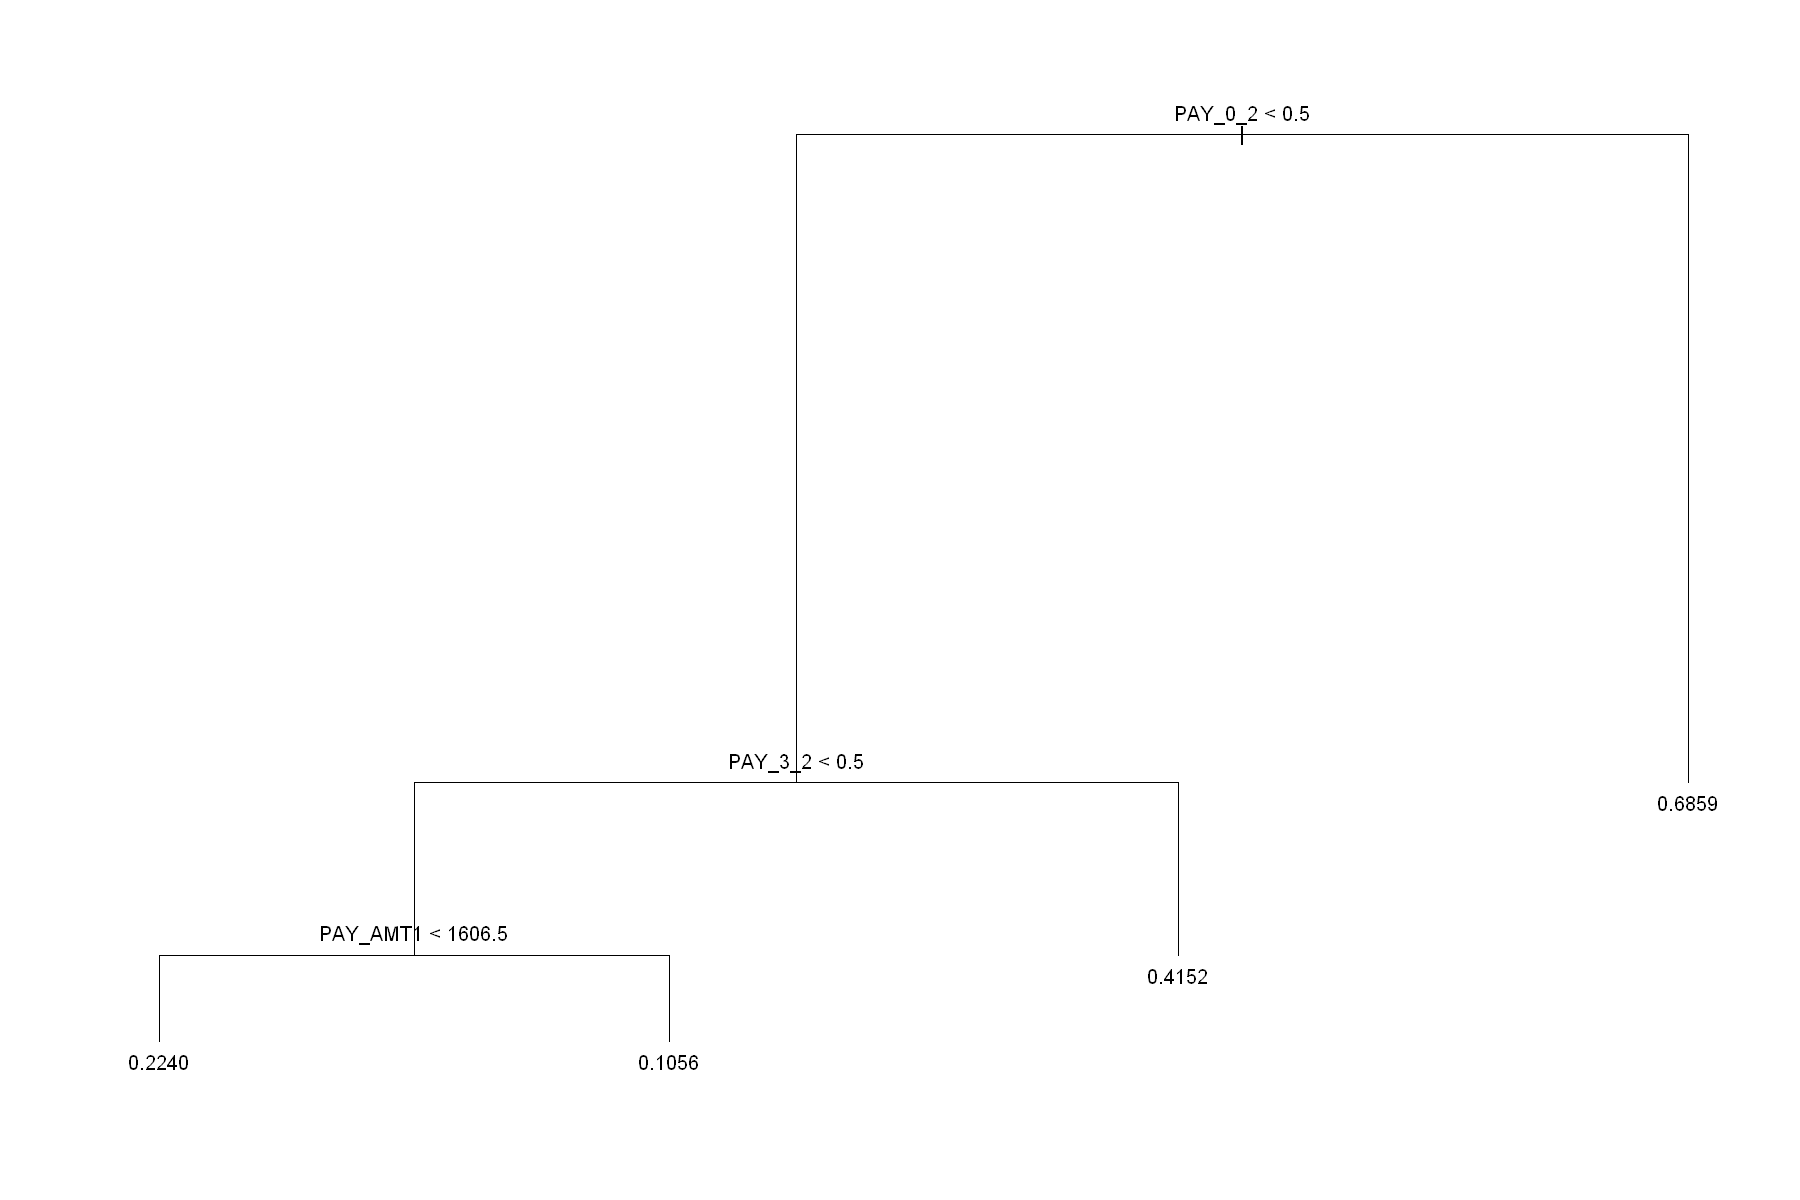

In [264]:
options(repr.plot.width=15, repr.plot.height=10)
plot(md_rtree)
text(md_rtree, pretty=0)

In [266]:
library(ROCR)
# area under curve
DTPrediction <- prediction(md_rtree,credit_test$default)
aucDT <- performance(pred, measure = "auc")
aucDT <- aucDT@y.values[[1]]
aucDT

Warning message in is.na(default ~ cust_id + LIMIT_BAL + AGE + BILL_AMT1 + BILL_AMT2 + :
"is.na() applied to non-(list or vector) of type 'language'"


ERROR: Error in vapply(predictions, anyNA, logical(1)): anyNA() applied to non-(list or vector) of type 'language'


Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


Attaching package: 'rattle'


The following object is masked from 'package:randomForest':

    importance




   predicted
       0    1
  0 9028  326
  1 1926  712

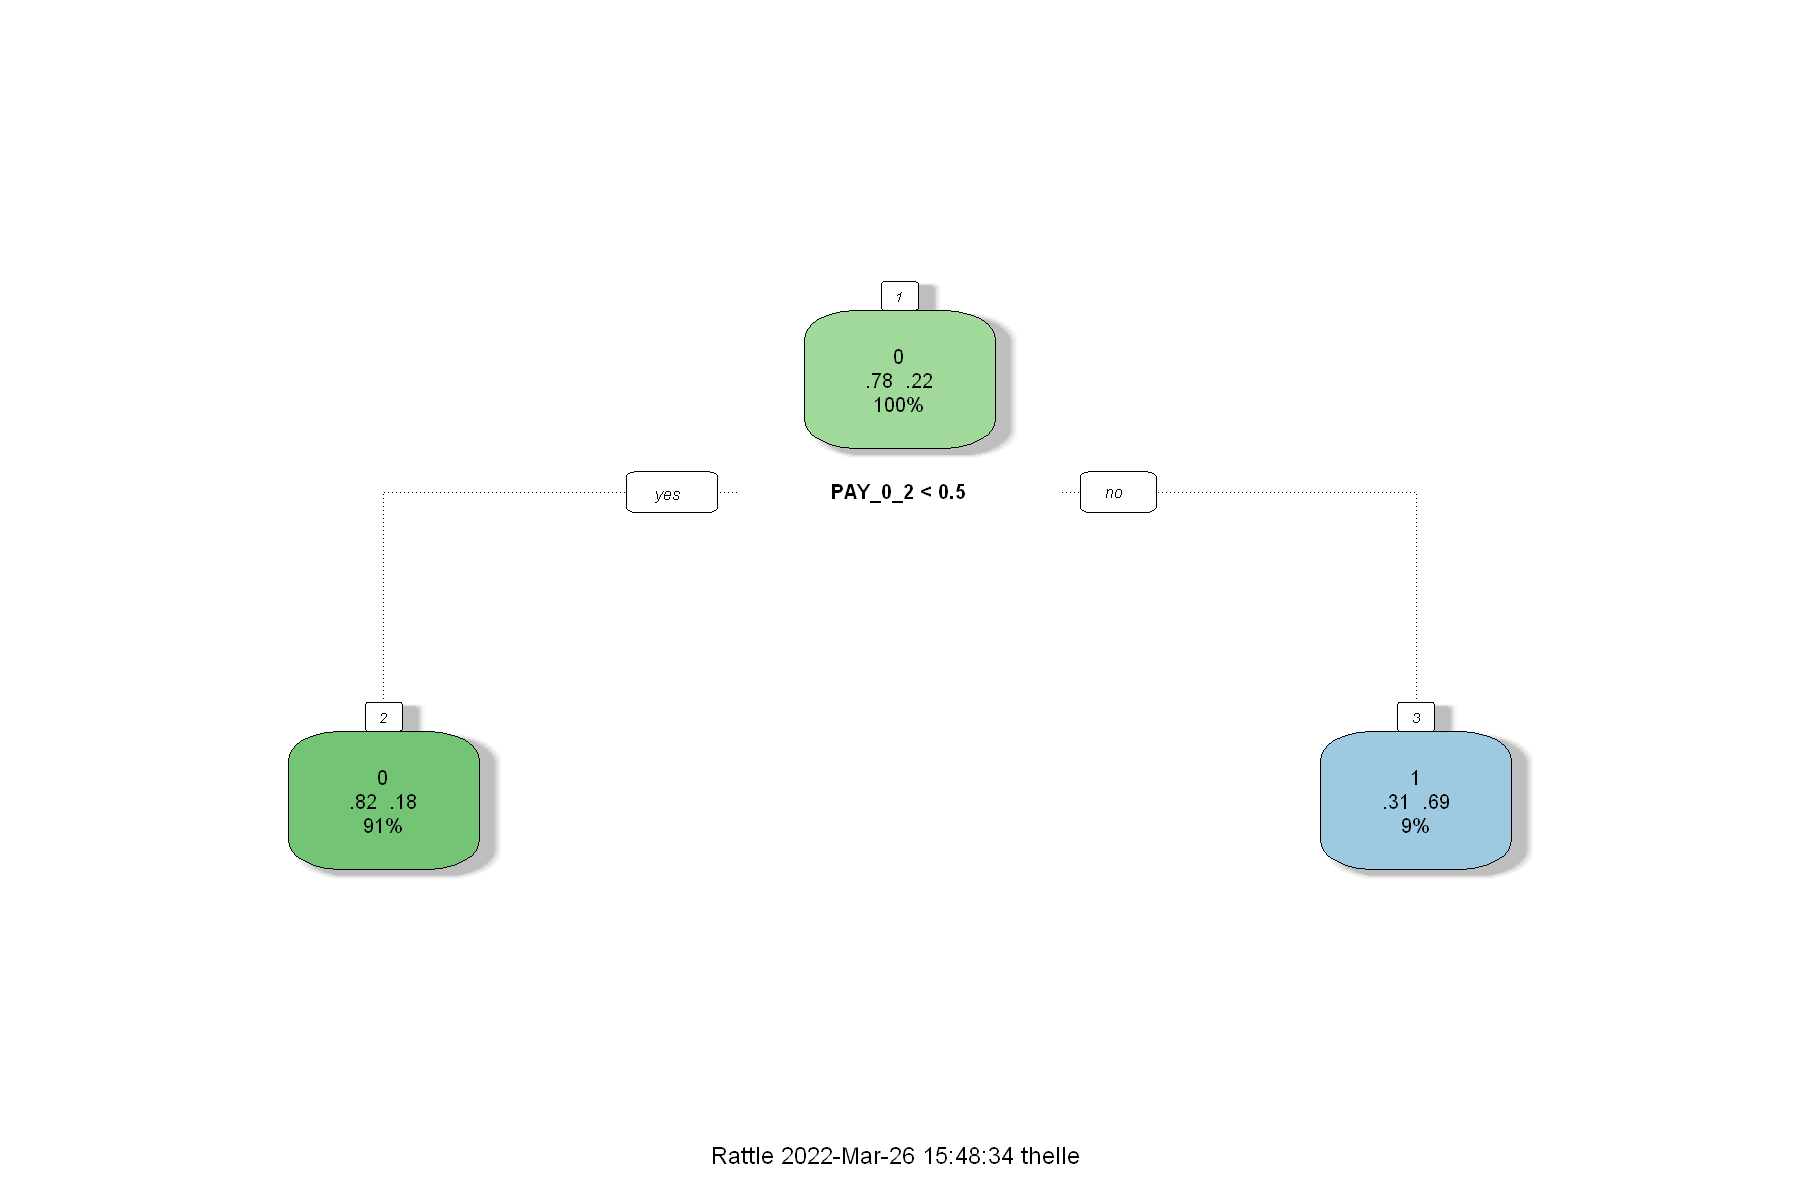

[[1]]
[1] 0.617525

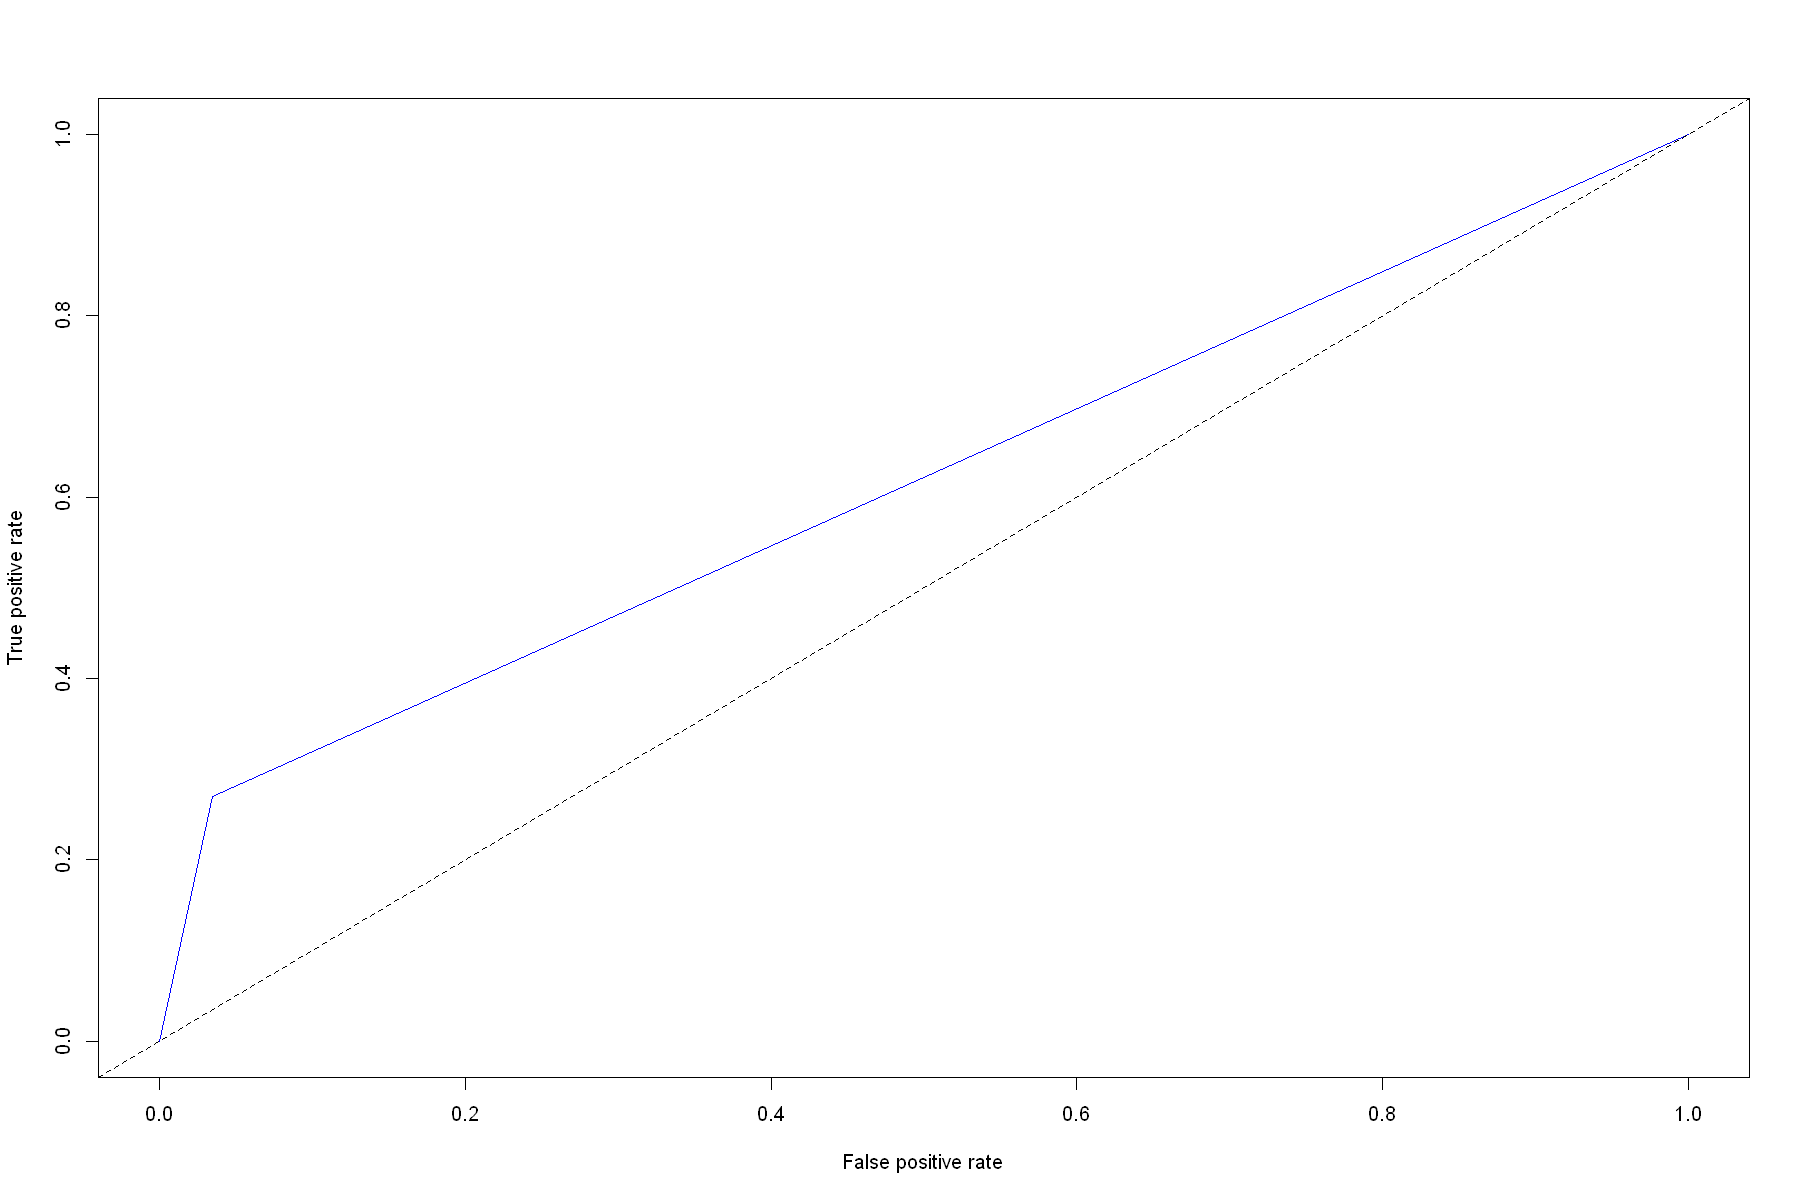

In [276]:
#from https://www.r-bloggers.com/2020/08/roc-for-decision-trees-where-did-the-data-come-from/

library(rpart)

df <- credit_train
set.seed(1)
mytree <- rpart(default ~ ., data = credit_train, method="class")

library(rattle)
library(rpart.plot)
library(RColorBrewer)

fancyRpartPlot(mytree, uniform=TRUE)
predicted <- predict(mytree, type="class")

table(credit_train$default,predicted)

library(ROCR)
pred <- prediction(predict(mytree, type="prob")[, 2], credit_train$default)
plot(performance(pred, "tpr", "fpr"), col="blue")
abline(0, 1, lty=2)
auc <- performance(pred, "auc")
auc@y.values

In [281]:
acc_tree =(9028 + 712) / (9028 + 712 + 326 + 1926)

In [293]:
#Accuracy
print(paste0("Accuracy: ", round(acc_tree,2)))
#Aggregated AUC after CV = 10
print(paste0("Aggregated AUC: ", round(0.617525020007414,2)))

[1] "Accuracy: 0.81"
[1] "Aggregated AUC: 0.62"
